In [1]:
from glob import glob
import matplotlib.pyplot as plt
from pyAudioAnalysis import ShortTermFeatures as sf
import librosa
import librosa.display
import numpy as np
import pandas as pd
import warnings
import pickle
warnings.filterwarnings("ignore")

In [2]:
file_paths_1 = glob('Audio-Classification-master/Audio_data/*/*')

In [3]:
len(file_paths_1)

116

In [4]:
neutral_1 = glob('Audio-Classification-master/Audio_data/neutral/*.wav')
angry_1 = glob('Audio-Classification-master/Audio_data/angry/*.wav')
neutral_2 = glob('URDU-Dataset-master/Neutral/*.wav')
happy = glob('URDU-Dataset-master/Happy/*.wav')
angry_2 = glob('URDU-Dataset-master/Angry/*.wav')

In [5]:
angry = angry_1+angry_2
neutral = neutral_1 + neutral_2
negative = angry 
positive = happy
paths = positive +  negative + neutral
len(paths)

410

In [6]:
paths

['URDU-Dataset-master/Happy\\SF1_F10_H010.wav',
 'URDU-Dataset-master/Happy\\SF1_F11_H011.wav',
 'URDU-Dataset-master/Happy\\SF1_F12_H012.wav',
 'URDU-Dataset-master/Happy\\SF1_F1_H01.wav',
 'URDU-Dataset-master/Happy\\SF1_F2_H02.wav',
 'URDU-Dataset-master/Happy\\SF1_F3_H03.wav',
 'URDU-Dataset-master/Happy\\SF1_F4_H04.wav',
 'URDU-Dataset-master/Happy\\SF1_F5_H05.wav',
 'URDU-Dataset-master/Happy\\SF1_F6_H06.wav',
 'URDU-Dataset-master/Happy\\SF1_F7_H07.wav',
 'URDU-Dataset-master/Happy\\SF1_F8_H08.wav',
 'URDU-Dataset-master/Happy\\SF1_F9_H09.wav',
 'URDU-Dataset-master/Happy\\SF2_F1_H013.wav',
 'URDU-Dataset-master/Happy\\SF2_F2_H014.wav',
 'URDU-Dataset-master/Happy\\SF3_F1_H015.wav',
 'URDU-Dataset-master/Happy\\SF3_F2_H016.wav',
 'URDU-Dataset-master/Happy\\SF4_F1_H017.wav',
 'URDU-Dataset-master/Happy\\SF4_F2_H018.wav',
 'URDU-Dataset-master/Happy\\SF4_F3_H019.wav',
 'URDU-Dataset-master/Happy\\SF4_F4_H020.wav',
 'URDU-Dataset-master/Happy\\SF5_F1_H021.wav',
 'URDU-Dataset-mast

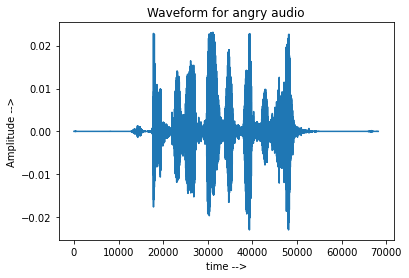

In [7]:

y_angry = librosa.load(angry[0])
y_angry_time = librosa.frames_to_time(y_angry[0])
plt.plot(y_angry_time)
plt.xlabel('time -->')
plt.ylabel('Amplitude -->')
plt.title('Waveform for angry audio')
plt.show()

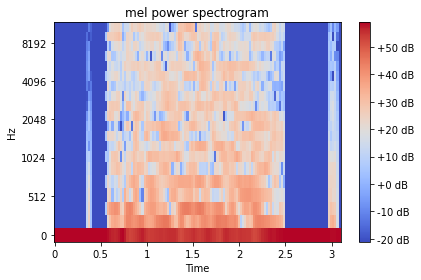

In [8]:
spec_angry = librosa.feature.mfcc(y_angry_time)
spec_angry = librosa.amplitude_to_db(spec_angry)

librosa.display.specshow(spec_angry, x_axis='time', y_axis='mel')


plt.title('mel power spectrogram')


plt.colorbar(format='%+02.0f dB')

plt.tight_layout()


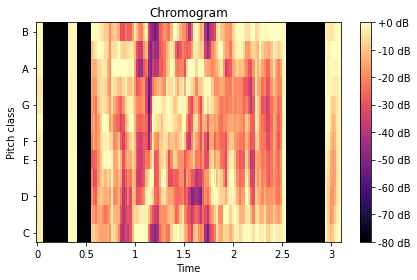

In [9]:
spec_angry = librosa.feature.chroma_stft(y_angry_time)
spec_angry = librosa.amplitude_to_db(spec_angry)
librosa.display.specshow(spec_angry, y_axis='chroma', x_axis='time')
plt.title('Chromogram')


plt.colorbar(format='%+02.0f dB')

plt.tight_layout()

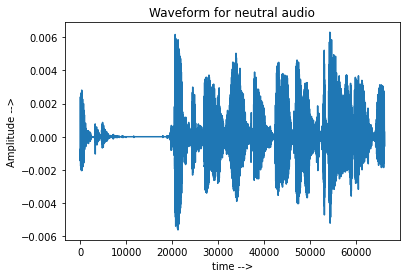

In [10]:
#neutral
y_neutral,sr = librosa.load(neutral[10])
y_neutral_time = librosa.frames_to_time(y_neutral)
plt.plot(y_neutral_time)
plt.xlabel('time -->')
plt.ylabel('Amplitude -->')
plt.title('Waveform for neutral audio')
plt.show()

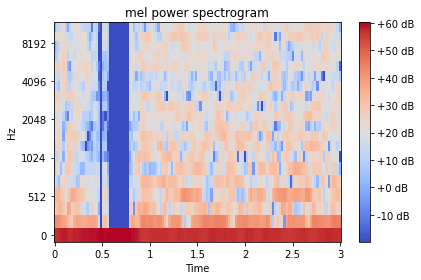

In [11]:
spec_neutral = librosa.feature.mfcc(y_neutral_time)
spec_neutral = librosa.amplitude_to_db(spec_neutral)
librosa.display.specshow(spec_neutral, sr=sr, x_axis='time', y_axis='mel')


plt.title('mel power spectrogram')


plt.colorbar(format='%+02.0f dB')

plt.tight_layout()

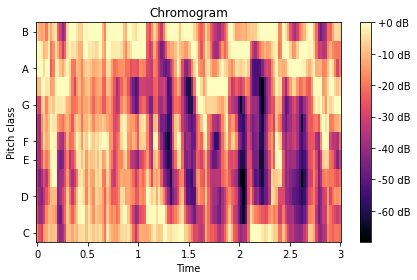

In [12]:
spec_neutral = librosa.feature.chroma_stft(y_neutral)
spec_neutral = librosa.amplitude_to_db(spec_neutral)
librosa.display.specshow(spec_neutral, y_axis='chroma', x_axis='time')
plt.title('Chromogram')


plt.colorbar(format='%+02.0f dB')

plt.tight_layout()

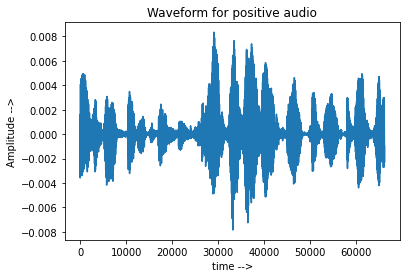

In [13]:
y_positive,sr = librosa.load(positive[0])
y_pos_time = librosa.frames_to_time(y_positive)
plt.plot(y_pos_time)
plt.xlabel('time -->')
plt.ylabel('Amplitude -->')
plt.title('Waveform for positive audio')
plt.show()

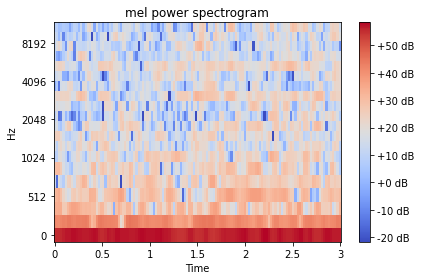

In [14]:
spec_pos = librosa.feature.mfcc(y_pos_time)
spec_pos = librosa.amplitude_to_db(spec_pos)
librosa.display.specshow(spec_pos, sr=sr, x_axis='time', y_axis='mel')

plt.title('mel power spectrogram')

plt.colorbar(format='%+02.0f dB')

plt.tight_layout()

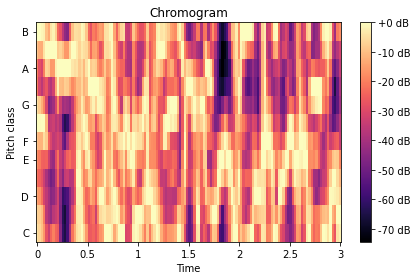

In [15]:
spec_pos = librosa.feature.chroma_stft(y_pos_time)
spec_pos = librosa.amplitude_to_db(spec_pos)
librosa.display.specshow(spec_pos, y_axis='chroma', x_axis='time')
plt.title('Chromogram')


plt.colorbar(format='%+02.0f dB')

plt.tight_layout()

In [16]:
emotions=[]
for item in positive:
    emotions.append("positive")
for item in negative:
    emotions.append("negative")
for item in neutral:
    emotions.append("neutral")

In [17]:
s_neg = 0
for i in range(len(emotions)):
    if(emotions[i]=='negative'):
        s_neg+=1
s_neg

150

In [18]:
s_neut = 0
for i in range(len(emotions)):
    if(emotions[i]=='neutral'):
        s_neut+=1
s_neut

160

In [19]:
s_pos = 0
for i in range(len(emotions)):
    if(emotions[i]=='positive'):
        s_pos+=1
s_pos

100

In [20]:
len(emotions)

410

In [21]:
data = {'Positive':s_pos, 'Neutral':s_neut, 'Negative':s_neg}
courses = list(data.keys())
values = list(data.values())

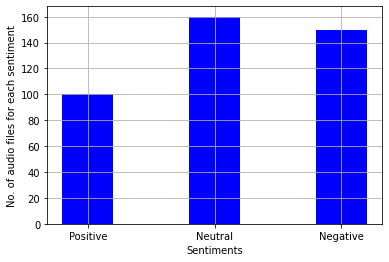

In [22]:
plt.bar(courses, values, color ='blue', width = 0.4)
plt.ylabel('No. of audio files for each sentiment')
plt.xlabel('Sentiments')
plt.grid()
plt.show()

In [23]:
def load_file(filepath):
    y,sr = librosa.load(filepath)
    return (y,sr)

In [24]:
def divide_segments(y_time,start):
    # divide into 50 ms segments
    # 50ms -> means 1111 samples    
    y_segmented = y_time[start:start+1111]
    return y_segmented

In [25]:
def stft(y_seg , sr, window, step):
    [f,f_name] = sf.feature_extraction(y_seg,sr, window, step,  deltas = False)
    return f

In [26]:
def feature_matricization(y_time):
    y_seg = divide_segments(y_time,0)
    y_stft = stft(y_seg,sr,0.05*sr,0.05*sr)
    y_stft = y_stft.reshape(34)
    
    start = 1111
    y_stfts = y_stft
    while(start <= len(y_time)-1111):
        y_seg = divide_segments(y_time,start)
        #print(y_seg)
        start += 2222
        y_stft = stft(y_seg,sr,0.05*sr,0.05*sr)
        #y_stft_arr = np.asarray(y_stft).T
        y_stft = y_stft.reshape(34)
        y_stfts = np.vstack((y_stfts, y_stft))
        #print(y_stft_arr.shape)

        #np.column_stack((y_stfts, y_stft_arr))
        
    if(len(y_stfts)<50):
        #cal how less
        x = 50 - len(y_stfts)%50
        zeros_arr = np.zeros(shape = (x,34))
        x_arr = np.asanyarray(y_stfts)
        x_arr = x_arr.reshape(-1,34)
        x_final = np.vstack((x_arr,zeros_arr))
        
        return x_final
    if(len(y_stfts)>=50):
        y_stfts = y_stfts[0:50]
        return np.asanyarray(y_stfts)

In [27]:
file_path = paths[0]
label = emotions[0]
labels = np.asarray(label)
y,sr = librosa.load(file_path)
y_time = librosa.frames_to_time(y)
feat = feature_matricization(y_time)
features = feat
for i in range(len(paths)):
    if(i!=0):
        print(i)
        file_path = paths[i]
        label = emotions[i]
        labels = np.vstack((labels,label))
        y,sr = librosa.load(file_path)
        y_time = librosa.frames_to_time(y)
        feat = feature_matricization(y_time)
        features = np.vstack((features,feat))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [28]:
type(features)

numpy.ndarray

In [29]:
features.shape

(20500, 34)

In [30]:
indices = features.shape[0]/50
indices

410.0

In [31]:
features_seg = np.split(features,indices)

In [32]:
len(features_seg[0][0])

34

In [33]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
le = LabelEncoder()
labels = to_categorical(le.fit_transform(labels))
labels

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features_seg,labels)

In [35]:
len(X_train)

307

In [36]:
len(X_test)

103

In [37]:
len(y_train)

307

In [38]:
len(y_test)

103

In [39]:
y_train.shape

(307, 3)

In [40]:
X_train_arr = np.asanyarray(X_train)
X_train_arr.shape

(307, 50, 34)

In [41]:
X_test_arr = np.asanyarray(X_test)
X_test_arr.shape

(103, 50, 34)

In [42]:
import tensorflow

In [43]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential,model_from_yaml

In [44]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [45]:
y_train = np.asarray(y_train).astype('float32').reshape(-1,3)
y_test = np.asarray(y_test).astype('float32').reshape(-1,3)

In [46]:
y_train[0].shape

(3,)

In [47]:
model = Sequential()
model.add(Conv1D(32,5,input_shape = (50,34)))
model.add(Conv1D(64,4))
model.add(MaxPooling1D(3))
model.add(Conv1D(128,2))
model.add(Dropout(0.1))
model.add(MaxPooling1D(2))
model.add((Conv1D(128,2)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.4))
model.add(Dense(3,activation='softmax'))

In [48]:
model.compile(optimizer='adam',loss=tensorflow.keras.losses.categorical_crossentropy,metrics = tensorflow.keras.metrics.categorical_accuracy)

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 46, 32)            5472      
                                                                 
 conv1d_1 (Conv1D)           (None, 43, 64)            8256      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 14, 64)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 13, 128)           16512     
                                                                 
 dropout (Dropout)           (None, 13, 128)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 6, 128)           0         
 1D)                                                    

In [50]:
model.fit(X_train_arr, y_train, epochs = 20)

Epoch 1/20
10/10 [==============================] - 1s 7ms/step - loss: 3.6200 - categorical_accuracy: 0.3974
Epoch 2/20
10/10 [==============================] - 0s 8ms/step - loss: 1.7129 - categorical_accuracy: 0.4625
Epoch 3/20
10/10 [==============================] - 0s 7ms/step - loss: 0.9836 - categorical_accuracy: 0.5896
Epoch 4/20
10/10 [==============================] - 0s 8ms/step - loss: 0.7721 - categorical_accuracy: 0.6515
Epoch 5/20
10/10 [==============================] - 0s 7ms/step - loss: 0.6084 - categorical_accuracy: 0.7329
Epoch 6/20
10/10 [==============================] - 0s 8ms/step - loss: 0.6039 - categorical_accuracy: 0.7329
Epoch 7/20
10/10 [==============================] - 0s 8ms/step - loss: 0.5789 - categorical_accuracy: 0.7329
Epoch 8/20
10/10 [==============================] - 0s 7ms/step - loss: 0.5244 - categorical_accuracy: 0.7720
Epoch 9/20
10/10 [==============================] - 0s 8ms/step - loss: 0.5145 - categorical_accuracy: 0.7264
Epoch 10/2

In [51]:
model.evaluate(X_train_arr, y_train)

10/10 [==============================] - 0s 3ms/step - loss: 0.2551 - categorical_accuracy: 0.8958


[0.2550577223300934, 0.895765483379364]

In [52]:
model.evaluate(X_test_arr,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.5460 - categorical_accuracy: 0.7961


[0.5459735989570618, 0.7961165308952332]

4/4 [==============================] - 0s 3ms/step


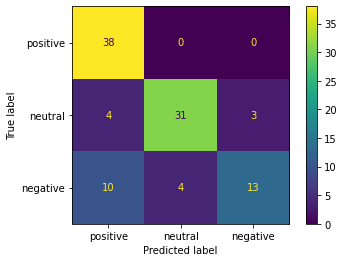

In [53]:
p = model.predict(X_test_arr)
cm = confusion_matrix(y_test.argmax(axis=1), p.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['positive','neutral','negative'])

disp.plot()
plt.show()

10/10 [==============================] - 0s 3ms/step


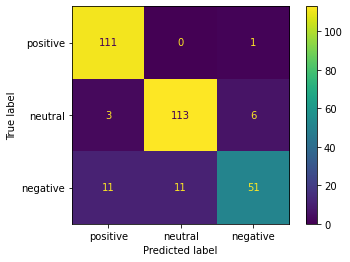

In [54]:
p = model.predict(X_train_arr)
cm = confusion_matrix(y_train.argmax(axis=1), p.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['positive','neutral','negative'])

disp.plot()
plt.show()

In [55]:
val_test = 'URDU-Dataset-master\Angry\SM1_F1_A01.wav'

In [56]:
y_val,sr = load_file(val_test)

In [57]:
y_val_time = librosa.frames_to_time(y_val)

In [58]:
feat_matrix = feature_matricization(y_val_time)

In [59]:
feat_matrix = np.asanyarray(feat_matrix)

In [60]:
feat_matrix = feat_matrix.reshape(1,50,34)

In [61]:
feat_matrix.shape

(1, 50, 34)

In [62]:
y = model.predict(feat_matrix)

1/1 [==============================] - 0s 22ms/step


In [63]:
y = y.reshape(3)
y

array([9.959906e-01, 6.177808e-05, 3.947652e-03], dtype=float32)

In [64]:
if(y[0]>y[2] and y[0]>y[1]):
    y[0]=1
    y[1]=0
    y[2]=0
elif(y[1]>y[2] and y[1]>y[0]):
    y[0]=0
    y[1]=1
    y[2]=0
else:
    y[0]=0
    y[1]=0
    y[2]=1

In [65]:
y = y.astype('int')

In [66]:
y

array([1, 0, 0])

In [67]:
print(le.classes_)

['negative' 'neutral' 'positive']


In [68]:
le.inverse_transform(y.reshape(3))

array(['neutral', 'negative', 'negative'], dtype='<U8')

In [69]:
val_test = 'Audio-Classification-master/Audio_data/test/neutral_1.wav'

In [70]:
y_val,sr = load_file(val_test)

In [71]:
y_val_time = librosa.frames_to_time(y_val)

In [72]:
feat_matrix = feature_matricization(y_val_time)

In [73]:
feat_matrix = np.asanyarray(feat_matrix)

In [74]:
feat_matrix = feat_matrix.reshape(1,50,34)

In [75]:
feat_matrix.shape

(1, 50, 34)

In [76]:
y = model.predict(feat_matrix)
y

1/1 [==============================] - 0s 21ms/step


array([[6.312399e-03, 9.935999e-01, 8.773523e-05]], dtype=float32)

In [77]:
y = y.reshape(3)

In [78]:
if(y[0]>y[2] and y[0]>y[1]):
    y[0]=1
    y[1]=0
    y[2]=0
elif(y[1]>y[2] and y[1]>y[0]):
    y[0]=0
    y[1]=1
    y[2]=0
else:
    y[0]=0
    y[1]=0
    y[2]=1

In [79]:
y

array([0., 1., 0.], dtype=float32)

In [80]:
print(le.classes_)

['negative' 'neutral' 'positive']


In [125]:
val_test = 'URDU-Dataset-master\Happy\SM7_F26_H098.wav'
val_test

'URDU-Dataset-master\\Happy\\SM7_F26_H098.wav'

In [126]:
y_val,sr = load_file(val_test)
y_val_time = librosa.frames_to_time(y_val)
feat_matrix = feature_matricization(y_val_time)
feat_matrix = np.asanyarray(feat_matrix)
feat_matrix = feat_matrix.reshape(1,50,34)
y = model.predict(feat_matrix)
y = y.reshape(3)

1/1 [==============================] - 0s 22ms/step


In [127]:
if(y[0]>y[2] and y[0]>y[1]):
    y[0]=1
    y[1]=0
    y[2]=0
elif(y[1]>y[2] and y[1]>y[0]):
    y[0]=0
    y[1]=1
    y[2]=0
else:
    y[0]=0
    y[1]=0
    y[2]=1

In [128]:
y

array([0., 0., 1.], dtype=float32)

In [129]:
print(le.classes_)

['negative' 'neutral' 'positive']


In [130]:
model.save('model_82.h5')

In [174]:
val_test = 'Audio-Classification-master/Audio_data/test/WhatsApp Audio 2022-11-19 at 15.10.51.wav'

In [175]:
y_val, sr = librosa.load(val_test)
y_val_time = librosa.frames_to_time(y_val)
feat_matrix = feature_matricization(y_val_time)
feat_matrix = np.asanyarray(feat_matrix)
feat_matrix = feat_matrix.reshape(1,50,34)
y = model.predict(feat_matrix)
y = y.reshape(3)

1/1 [==============================] - 0s 21ms/step


In [176]:
y

array([0.34558558, 0.6172193 , 0.03719514], dtype=float32)

In [168]:
if(y[0]>y[2] and y[0]>y[1]):
    y[0]=1
    y[1]=0
    y[2]=0
elif(y[1]>y[2] and y[1]>y[0]):
    y[0]=0
    y[1]=1
    y[2]=0
else:
    y[0]=0
    y[1]=0
    y[2]=1

In [169]:
y


array([0., 1., 0.], dtype=float32)

In [170]:
print(le.classes_)

['negative' 'neutral' 'positive']
